In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

In [ ]:
X_test.shape

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
y_test = y_test.reshape(-1,)

In [15]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [16]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

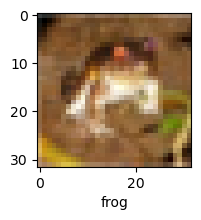

In [17]:
plot_sample(X_train, y_train, 0)

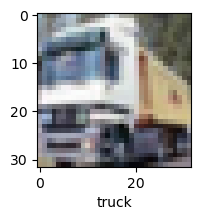

In [18]:
plot_sample(X_train, y_train, 1)

In [20]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [21]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)



Epoch 1/5


1563/1563 [==============================] - 120s 76ms/step - loss: 2.3011 - accuracy: 0.1257
Epoch 2/5
1563/1563 [==============================] - 112s 71ms/step - loss: 2.3000 - accuracy: 0.1261
Epoch 3/5
1563/1563 [==============================] - 113s 72ms/step - loss: 2.2993 - accuracy: 0.1377
Epoch 4/5
1563/1563 [==============================] - 106s 68ms/step - loss: 2.2985 - accuracy: 0.1532
Epoch 5/5
1563/1563 [==============================] - 105s 67ms/step - loss: 2.2975 - accuracy: 0.1508


In [24]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 10ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.37      0.35      0.36      1000
           1       0.00      0.00      0.00      1000
           2       0.11      0.74      0.20      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.27      0.24      0.25      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.29      0.51      0.37      1000

    accuracy                           0.18     10000
   macro avg       0.11      0.18      0.12     10000
weighted avg       0.11      0.18      0.12     10000



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [31]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 14s 8ms/step - loss: 2.3028 - accuracy: 0.0971
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 2.3028 - accuracy: 0.0996
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3028 - accuracy: 0.0981
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0989
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0977
Epoch 6/10
1563/1563 [==============================] - 12s 7ms/step - loss: 2.3028 - accuracy: 0.0974
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0975
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.3028 - accuracy: 0.0982
Epoch 9/10
1563/1563 [==============================] - 12s 8ms/step - loss: 2.3028 - accuracy: 0.0996
Epoch 10/10
1563/1563 [==============================] - 12s 8ms/step - l

In [33]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3026139736175537, 0.10000000149011612]

In [34]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[0.0988787 , 0.10091762, 0.09957892, 0.10074369, 0.09845303,
        0.10067317, 0.09981078, 0.10041422, 0.10011193, 0.10041793],
       [0.0988787 , 0.10091762, 0.09957892, 0.10074369, 0.09845303,
        0.10067317, 0.09981078, 0.10041422, 0.10011193, 0.10041793],
       [0.0988787 , 0.10091762, 0.09957892, 0.10074369, 0.09845303,
        0.10067317, 0.09981078, 0.10041422, 0.10011193, 0.10041793],
       [0.0988787 , 0.10091762, 0.09957892, 0.10074369, 0.09845303,
        0.10067317, 0.09981078, 0.10041422, 0.10011193, 0.10041793],
       [0.0988787 , 0.10091762, 0.09957892, 0.10074369, 0.09845303,
        0.10067317, 0.09981078, 0.10041422, 0.10011193, 0.10041793]],
      dtype=float32)

In [35]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[1, 1, 1, 1, 1]

In [36]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

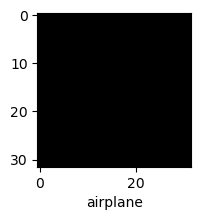

In [42]:
plot_sample(X_test, y_test,3)

In [41]:
classes[y_classes[3]]

'automobile'

In [39]:
classes[y_classes[3]]

'automobile'